In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
import pickle
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# Import Data

In [2]:
"""

<< TRAIN DATA >>

FOR GLOBAL USAGE

train_Y_mean : (num_of_cycle, output_dim)
train_Y_std  : (num_of_cycle, output_dim)
train_Y_min  : (num_of_cycle, output_dim)
train_Y_std  : (num_of_cycle, output_dim)

"""
# 'rdfwfv_wfv_rdf_train2020_RDFWFV_20201222_V10.xlsx'

file_path = 'rdfwfv_wfv_rdf_train2020_RDFWFV_20201222_V10.xlsx'

num_of_cycle = 200
num_in_cycle = 50

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()

train_Y_mean = np.mean(Y_all[:num_in_cycle*num_of_cycle], axis=0, dtype=np.float32)
train_Y_std = np.std(Y_all[:num_in_cycle*num_of_cycle], axis=0, dtype=np.float32)
train_Y_min = np.min(Y_all[:num_in_cycle*num_of_cycle], axis=0)
train_Y_max = np.max(Y_all[:num_in_cycle*num_of_cycle], axis=0)

print("mean:", train_Y_mean)
print("std:", train_Y_std)
print("min:", train_Y_min)
print("max:", train_Y_max)

(10000, 6) (10000, 6) (200, 6) (200, 6)

mean: [6.9403541e-12 3.4309983e-01 3.3316767e-01 1.4782393e-05 3.5800593e-05
 6.1970989e+01]
std: [1.2889904e-11 2.5909597e-02 2.7164428e-02 7.1507980e-06 1.3731923e-05
 1.3432132e+00]
min: [8.407e-14 2.400e-01 2.280e-01 3.816e-06 8.906e-06 6.030e+01]
max: [1.9850e-10 4.3600e-01 4.2800e-01 3.5650e-05 7.6300e-05 9.3065e+01]


In [3]:
"""

<< TEST DATA >>

1) test_real : (num_of_cycle, sample_num, output_dim) (ex) (6, 250, 6)
2) test_X_cycle : (num_of_cycle, input_dim)           (ex) (6, 7)

"""

file_path = '2021_RDFWFV_20210107.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)

X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()

test_real = Y_all

output_dim = test_real.shape[1]
num_of_cycle = 16
real_bin_num = 10
num_in_cycle = int(test_real.shape[0]/num_of_cycle)

print(" VARIABLES ")
print("output_dim", output_dim)
print("num_of_cycle", num_of_cycle)
print("num_in_cycle", num_in_cycle)
print("real_bin_num", real_bin_num)
print()

# for pair plot indexing
test_X_cycle = X_per_cycle

test_real = test_real.reshape(num_of_cycle, num_in_cycle, -1)
# Y_mean = np.mean(test_real, axis=1, dtype=np.float32).reshape(num_of_cycle, 1, num_of_cycle)
# Y_std = np.std(test_real, axis=1, dtype=np.float32).reshape(num_of_cycle, 1, num_of_cycle)
test_Y_mean = np.mean(Y_all[:num_in_cycle*num_of_cycle], axis=0, dtype=np.float32)
test_Y_std = np.std(Y_all[:num_in_cycle*num_of_cycle], axis=0, dtype=np.float32)
test_Y_min = np.min(Y_all[:num_in_cycle*num_of_cycle], axis=0)
test_Y_max = np.max(Y_all[:num_in_cycle*num_of_cycle], axis=0)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(4000, 6) (4000, 6) (16, 6) (16, 6)

 VARIABLES 
output_dim 6
num_of_cycle 16
num_in_cycle 250
real_bin_num 10

!! check !! test real shape (16, 250, 6)
!! check !! X value ( especially its precision )

[0.00000000e+00 5.78895870e+20 3.59561006e+19 2.88838939e-02
 1.00000000e+00 0.00000000e+00]
[0.00000000e+00 1.57080658e+19 1.19778254e+18 1.18212834e-02
 1.00000000e+00 0.00000000e+00]
[0.00000000e+00 1.97195192e+19 1.27521313e+18 3.02198477e-02
 1.00000000e+00 0.00000000e+00]
[0.00000000e+00 9.15906057e+20 1.15458844e+20 2.43231726e-02
 1.00000000e+00 0.00000000e+00]
[0.00000000e+00 4.90884204e+20 6.96683015e+19 1.91663741e-02
 1.00000000e+00 0.00000000e+00]
[6.90006771e-03 8.51545870e+19 8.25700721e+18 2.12625635e-02
 0.00000000e+00 1.00000000e+00]
[6.57265186e-03 1.74466960e+20 1.03200793e+19 2.63799659e-02
 0.00000000e+00 1.00000000e+00]
[1.85497107e-02 9.10148759e+19 8.11373190e+18 1.33503512e-02
 0.00000000e+00 1.00000000e+00]
[1.51214486e-02 7.96001377e+19 1.34431524e+19 3.71338

# Load samples and calculate EMD

In [4]:
########################################  CHANGE HERE ####################################################################

name = 'naive_date_day7_data_rdfwfv_wfv_rdf_train2020_RDFWFV_20201222_V10.xlsx_model_ccgan_seed_0_lr_0.0002_0.001_hidden_dim_250_batch_size_32_noise_d_100_sample_num_250_tr_num_in_cycle_50_layer_2_kappa_0.005_kernel_sigma_0.0005.pkl'

##########################################################################################################################

with (open(name, "rb")) as openfile:
    result = pickle.load(openfile)

test_sample = result['test sample']

test_gen = test_sample
print('test_sample shape:', test_sample.shape)

num_of_cycle = test_gen.shape[0]
num_in_cycle = test_real.shape[1]
test_gen_sample_num = test_gen.shape[1]


print("test data sample num:", test_gen_sample_num)
print("test data shape: ", test_gen.shape)

test_sample shape: (16, 250, 6)
test data sample num: 250
test data shape:  (16, 250, 6)


In [5]:
########### num_of cycle 수 필요(dim)

real_min_list = test_real.min(axis=1).reshape(num_of_cycle, 1, output_dim)
real_max_list = test_real.max(axis=1).reshape(num_of_cycle, 1, output_dim)
print(real_min_list.shape)
# print("minimum y value for each varaible:", real_min_list)
# print("maximum y value for each varaible:", real_max_list)

gen_min_list = test_gen.min(axis=1).reshape(num_of_cycle, 1, output_dim)
gen_max_list = test_gen.max(axis=1).reshape(num_of_cycle, 1, output_dim)
# print("minimum y value for each varaible:", gen_min_list)
# print("maximum y value for each varaible:", gen_max_list)

#################################################################
#  PAIRPLOT 에서는 test 데이터를 기준으로 local min, max를 사용하기로 함  #
#################################################################

minmax = 'train_real_global'

if minmax == 'test_real_local':
    min_list = real_min_list
    max_list = real_max_list
elif minmax == 'train_real_global':
    min_list = train_Y_min
    max_list = train_Y_max 
elif minmax == 'test_real_global':
    min_list = np.min(real_min_list, axis=0).flatten()
    max_list = np.max(real_max_list, axis=0).flatten()

    
print("minimum y value for each varaible:", min_list)
print("maximum y value for each varaible:", max_list)

(16, 1, 6)
minimum y value for each varaible: [8.407e-14 2.400e-01 2.280e-01 3.816e-06 8.906e-06 6.030e+01]
maximum y value for each varaible: [1.9850e-10 4.3600e-01 4.2800e-01 3.5650e-05 7.6300e-05 9.3065e+01]


In [6]:
def load_samples_and_calcultae_EMD(filepath, real_bin_num = 10, minmax = 'train_real_global', real_samples = test_real, min_list = train_Y_min, max_list = train_Y_max, train_mean=train_Y_mean, train_std = train_Y_std):
    with (open(name, "rb")) as openfile:
        result = pickle.load(openfile)
    test_gen = result['test sample']

    
    num_of_cycle = test_gen.shape[0]
    num_in_cycle = test_real.shape[1]
    test_gen_sample_num = test_gen.shape[1]


    ###################### Calculate EMD ######################
    test_EMD_score_list, test_sink_score_list = sample_utils.new_EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = real_samples, real_bin_num=real_bin_num, num_of_cycle=num_of_cycle, min_list = train_Y_min, max_list = train_Y_max, train_mean=train_Y_mean, train_std = train_Y_std, minmax=minmax, check=False) 
    print('mean of test_EMD_score_list', np.mean(test_EMD_score_list))

    ###################### Add 'EMD value' to file #####################
    result['test EMD'] = test_EMD_score_list
    with (open(name, "wb")) as openfile:
        pickle.dump(result, openfile)
    
    return result



def load_samples_and_calcultae_MMD(filepath, real_samples = test_real, min_list = train_Y_min, max_list = train_Y_max):
    with (open(name, "rb")) as openfile:
        result = pickle.load(openfile)
    test_gen = result['test sample']

    
    num_of_cycle = test_gen.shape[0]
    num_in_cycle = test_real.shape[1]
    test_gen_sample_num = test_gen.shape[1]


    ###################### Calculate MMD ######################
    test_MMD_score_list = []
    for i in range(len(test_real)):
        test_gen_tmp = (test_gen[i] - train_Y_min)/train_Y_max
        test_real_tmp = (test_real[i] - train_Y_min)/train_Y_max
        test_MMD_score_list.append(sample_utils.mmd_rbf(test_gen_tmp, test_real_tmp, gamma=100.0))    
    print('mean of test_MMD_score_list', np.mean(test_MMD_score_list))

    ###################### Add 'MMD value' to file #####################
    result['test MMD'] = np.array(test_MMD_score_list)
    with (open(name, "wb")) as openfile:
        pickle.dump(result, openfile)
    
    return result

In [7]:
result=load_samples_and_calcultae_EMD(name, real_bin_num = 10, minmax = 'train_real_global', real_samples = test_real, min_list = train_Y_min, max_list = train_Y_max, train_mean=train_Y_mean, train_std = train_Y_std)
test_emd = np.mean(result['test EMD'], axis=1)

Evaluating EMD for factor : 0 ...
Evaluating EMD for factor : 1 ...
Evaluating EMD for factor : 2 ...
Evaluating EMD for factor : 3 ...
Evaluating EMD for factor : 4 ...
Evaluating EMD for factor : 5 ...
Evaluating EMD for factor : 6 ...
Evaluating EMD for factor : 7 ...
Evaluating EMD for factor : 8 ...
Evaluating EMD for factor : 9 ...
Evaluating EMD for factor : 10 ...
Evaluating EMD for factor : 11 ...
Evaluating EMD for factor : 12 ...
Evaluating EMD for factor : 13 ...
Evaluating EMD for factor : 14 ...
Evaluating EMD for factor : 15 ...
mean of test_EMD_score_list 0.1450128554054863


In [8]:
result=load_samples_and_calcultae_MMD(name, real_samples = test_real, min_list = train_Y_min, max_list = train_Y_max)
test_mmd = result['test MMD']

mean of test_MMD_score_list 0.05378023816432032


In [9]:
def makedirs(path): 
    try: 
        os.makedirs(path) 
    except OSError: 
        if not os.path.isdir(path): 
            raise
fig_path = '../figures/RDF/'+name
makedirs(fig_path)


factor 0
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [0.00000000e+00 5.78895870e+20 3.59561006e+19 2.88838939e-02
 1.00000000e+00 0.00000000e+00]


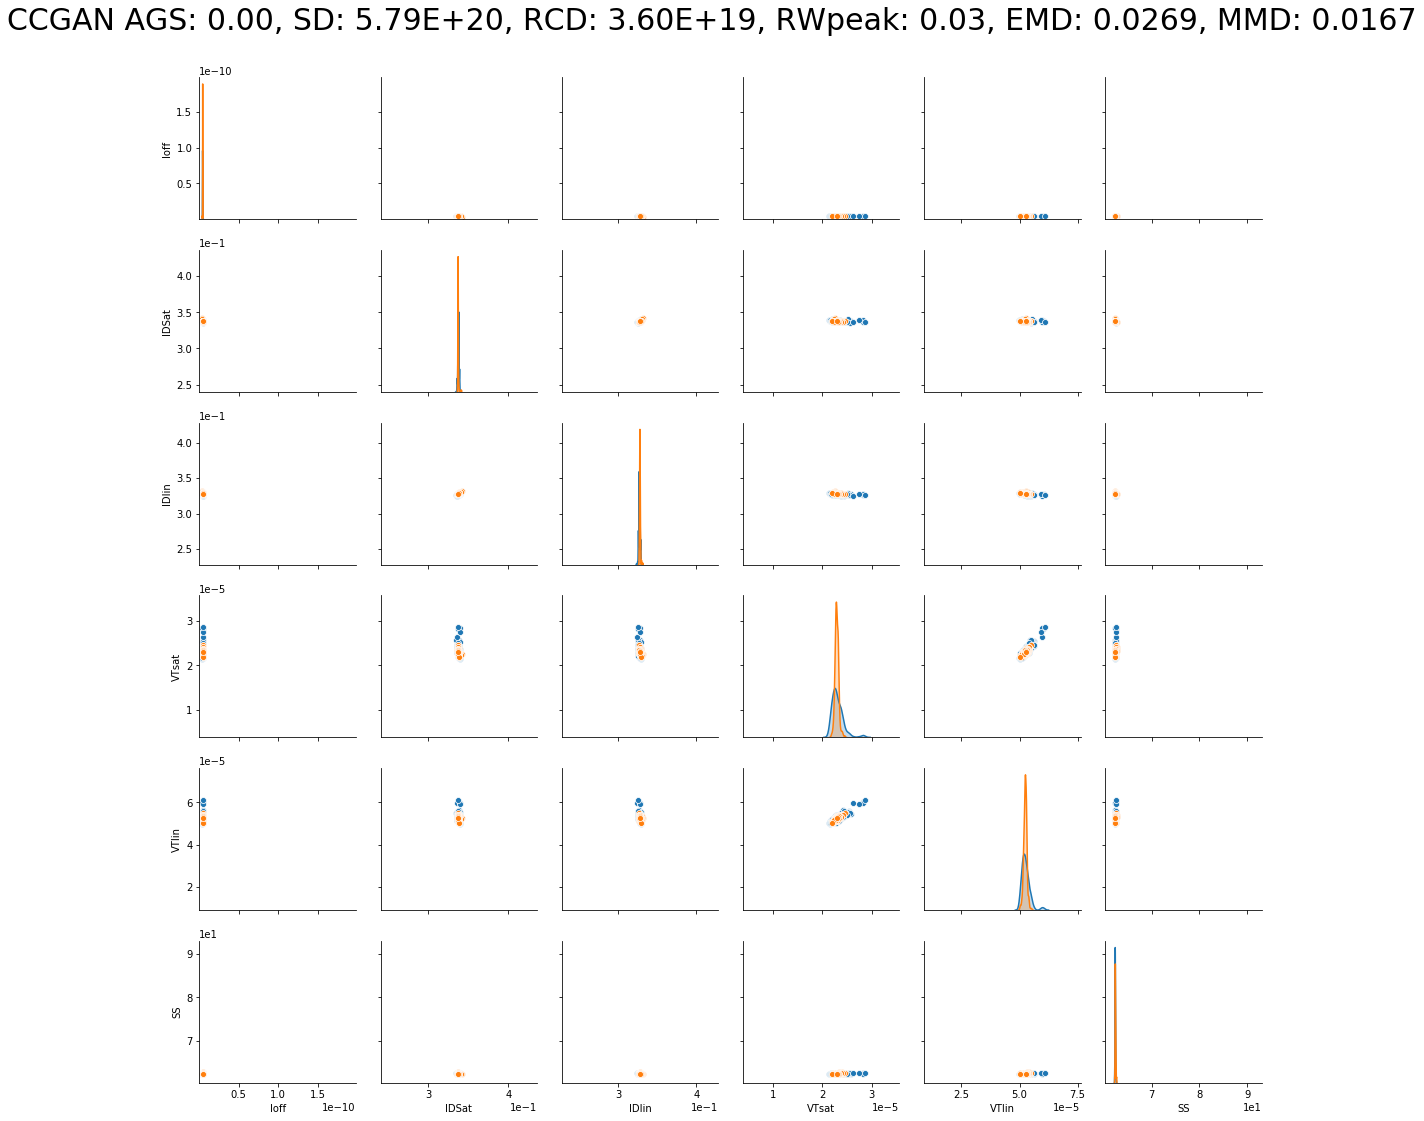

factor 1
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [0.00000000e+00 1.57080658e+19 1.19778254e+18 1.18212834e-02
 1.00000000e+00 0.00000000e+00]


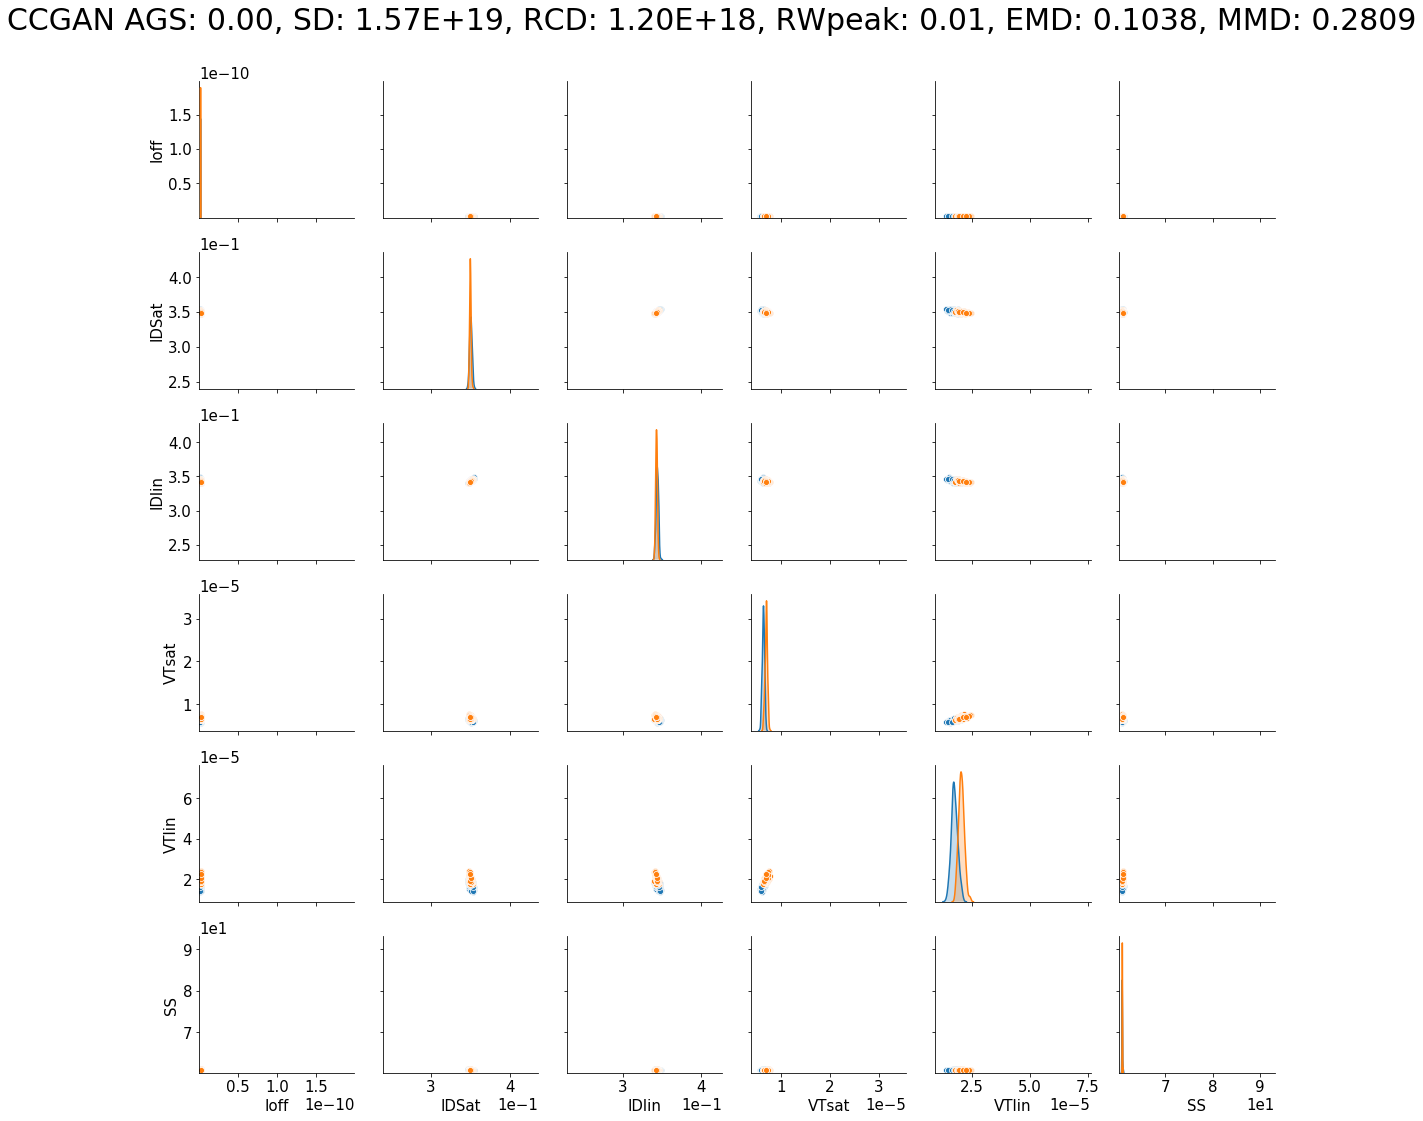

factor 2
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [0.00000000e+00 1.97195192e+19 1.27521313e+18 3.02198477e-02
 1.00000000e+00 0.00000000e+00]


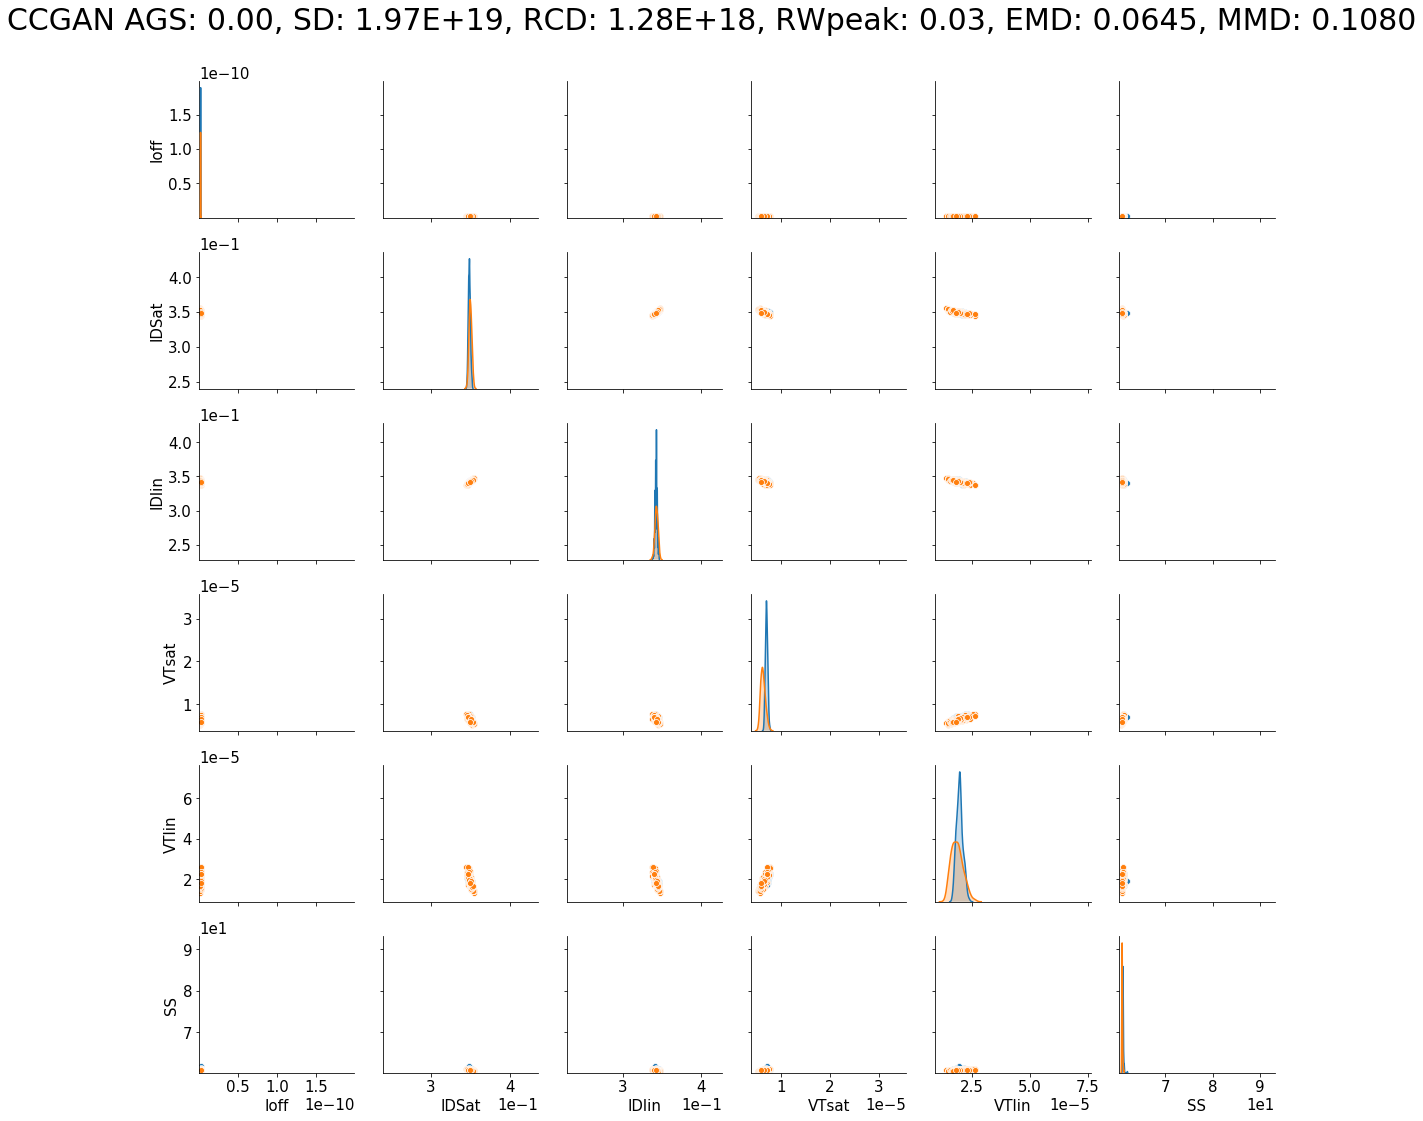

factor 3
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [0.00000000e+00 9.15906057e+20 1.15458844e+20 2.43231726e-02
 1.00000000e+00 0.00000000e+00]


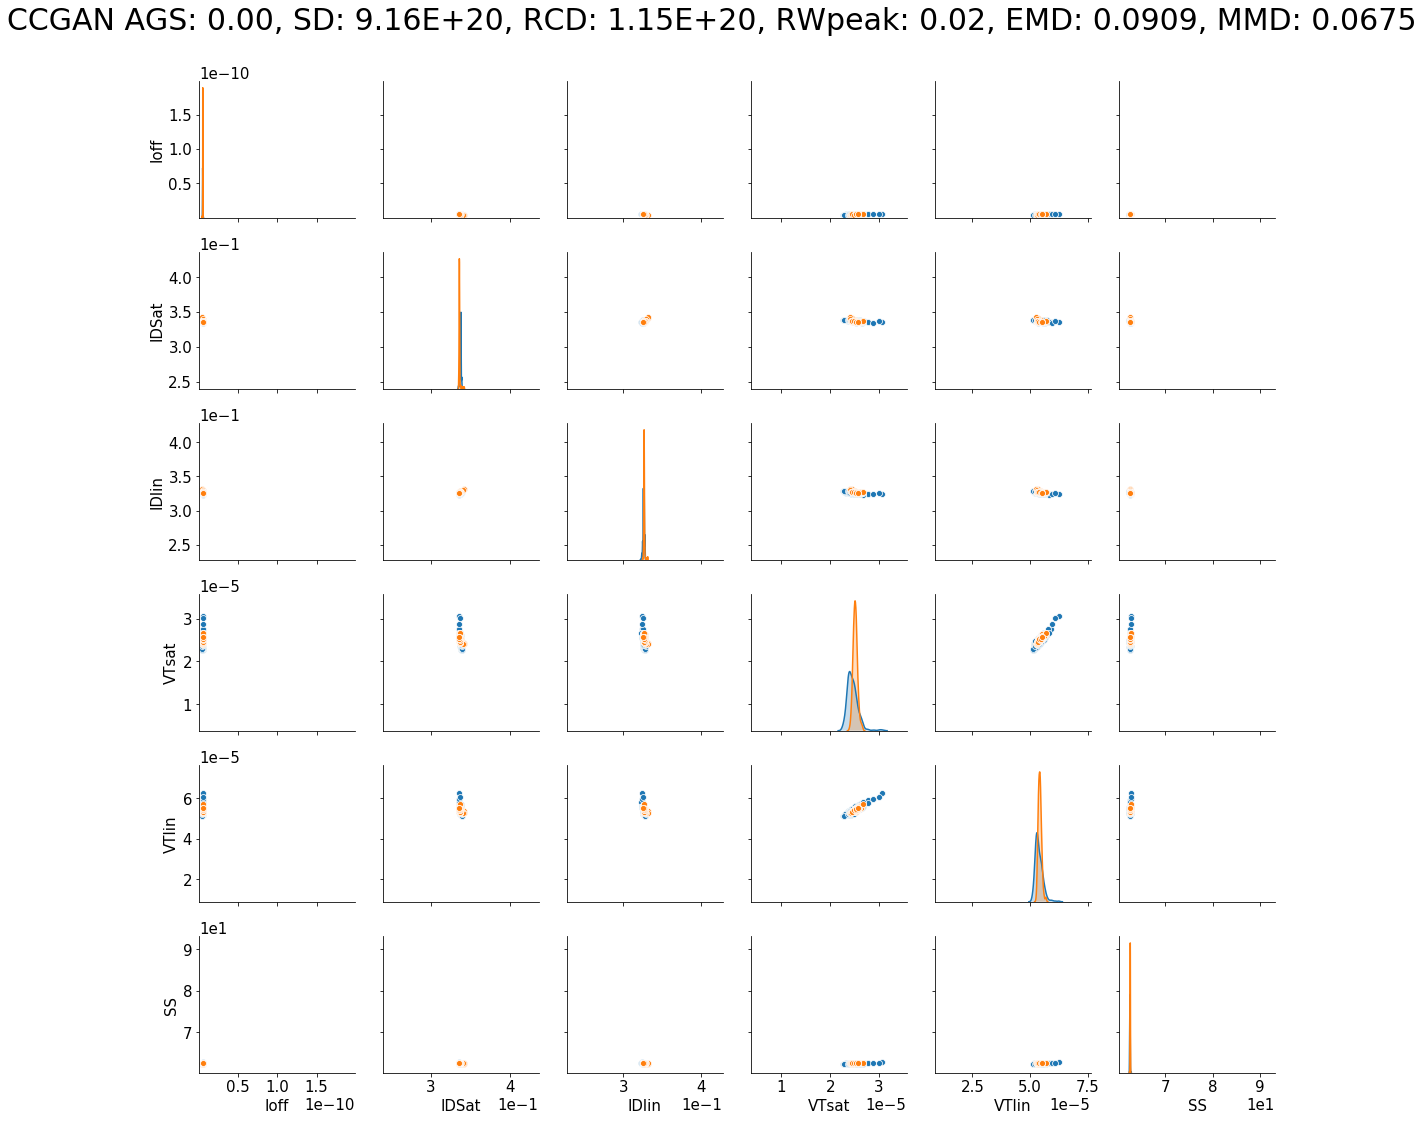

factor 4
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [0.00000000e+00 4.90884204e+20 6.96683015e+19 1.91663741e-02
 1.00000000e+00 0.00000000e+00]


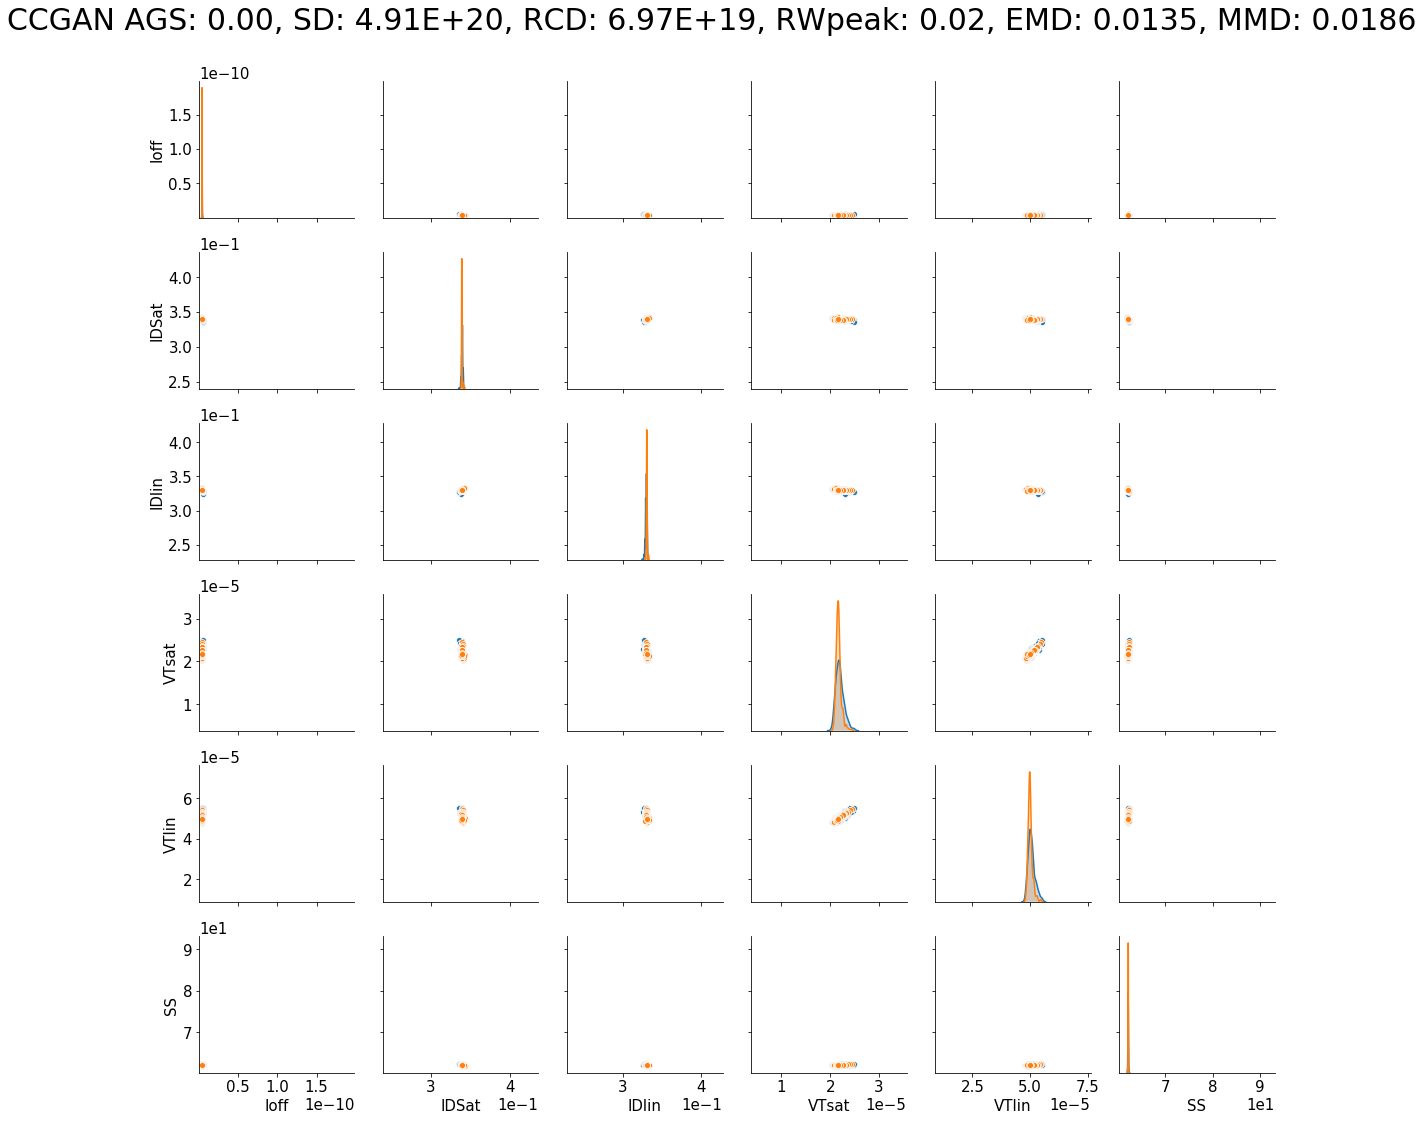

factor 5
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [6.90006771e-03 8.51545870e+19 8.25700721e+18 2.12625635e-02
 0.00000000e+00 1.00000000e+00]


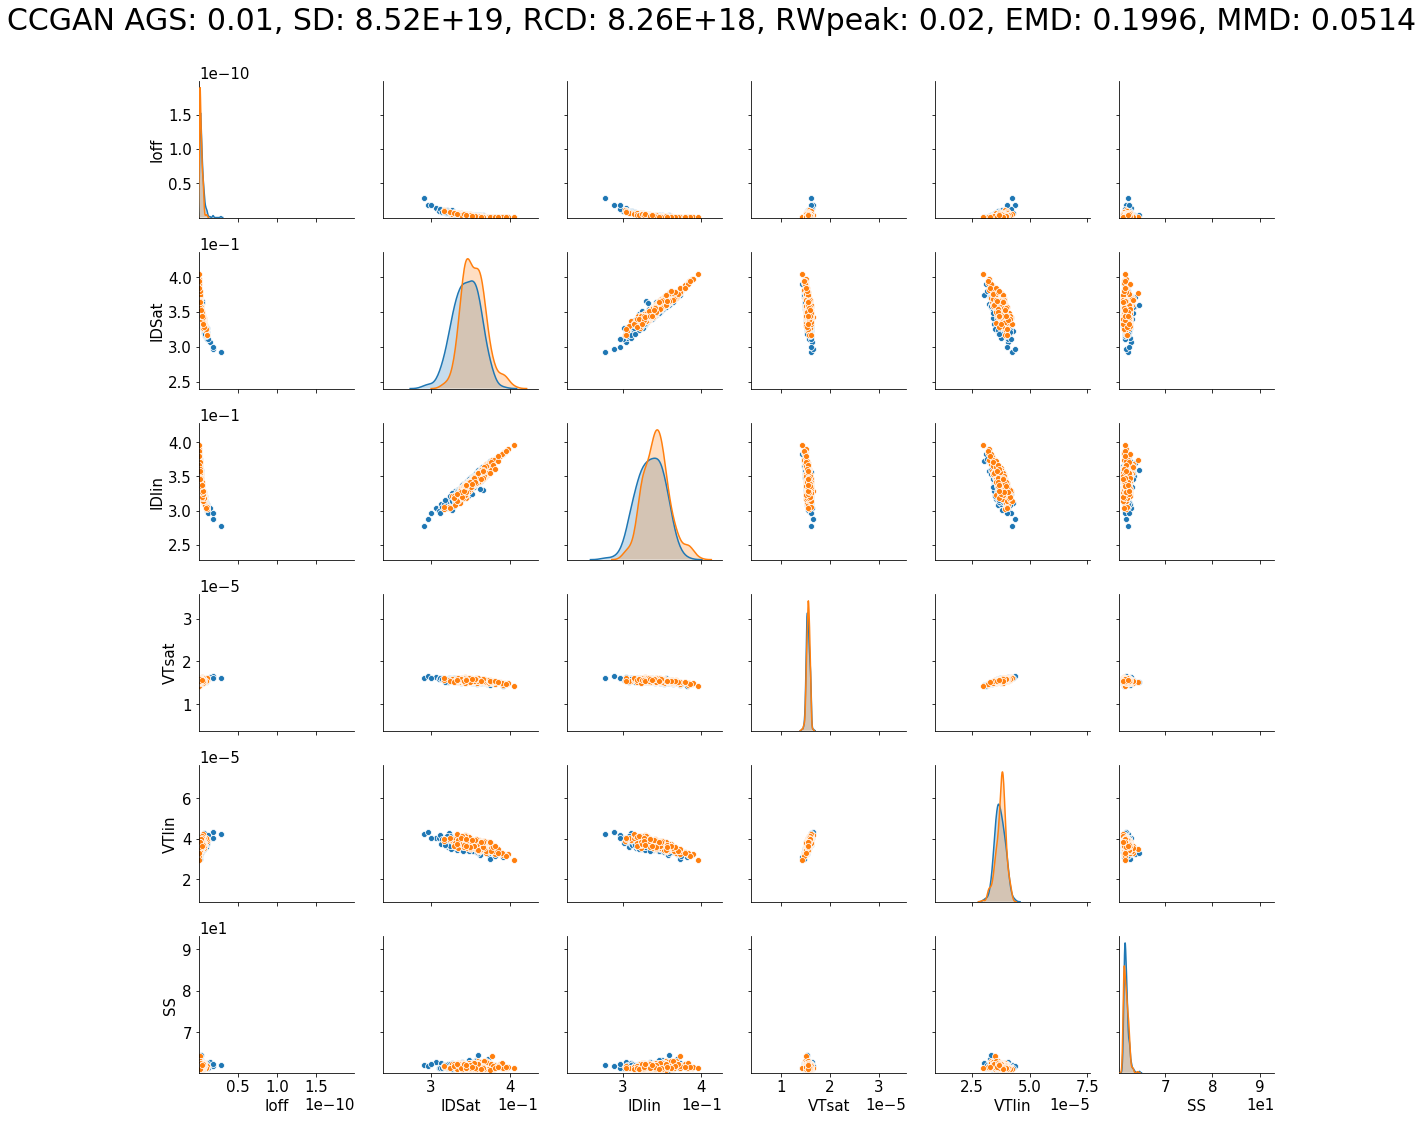

factor 6
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [6.57265186e-03 1.74466960e+20 1.03200793e+19 2.63799659e-02
 0.00000000e+00 1.00000000e+00]


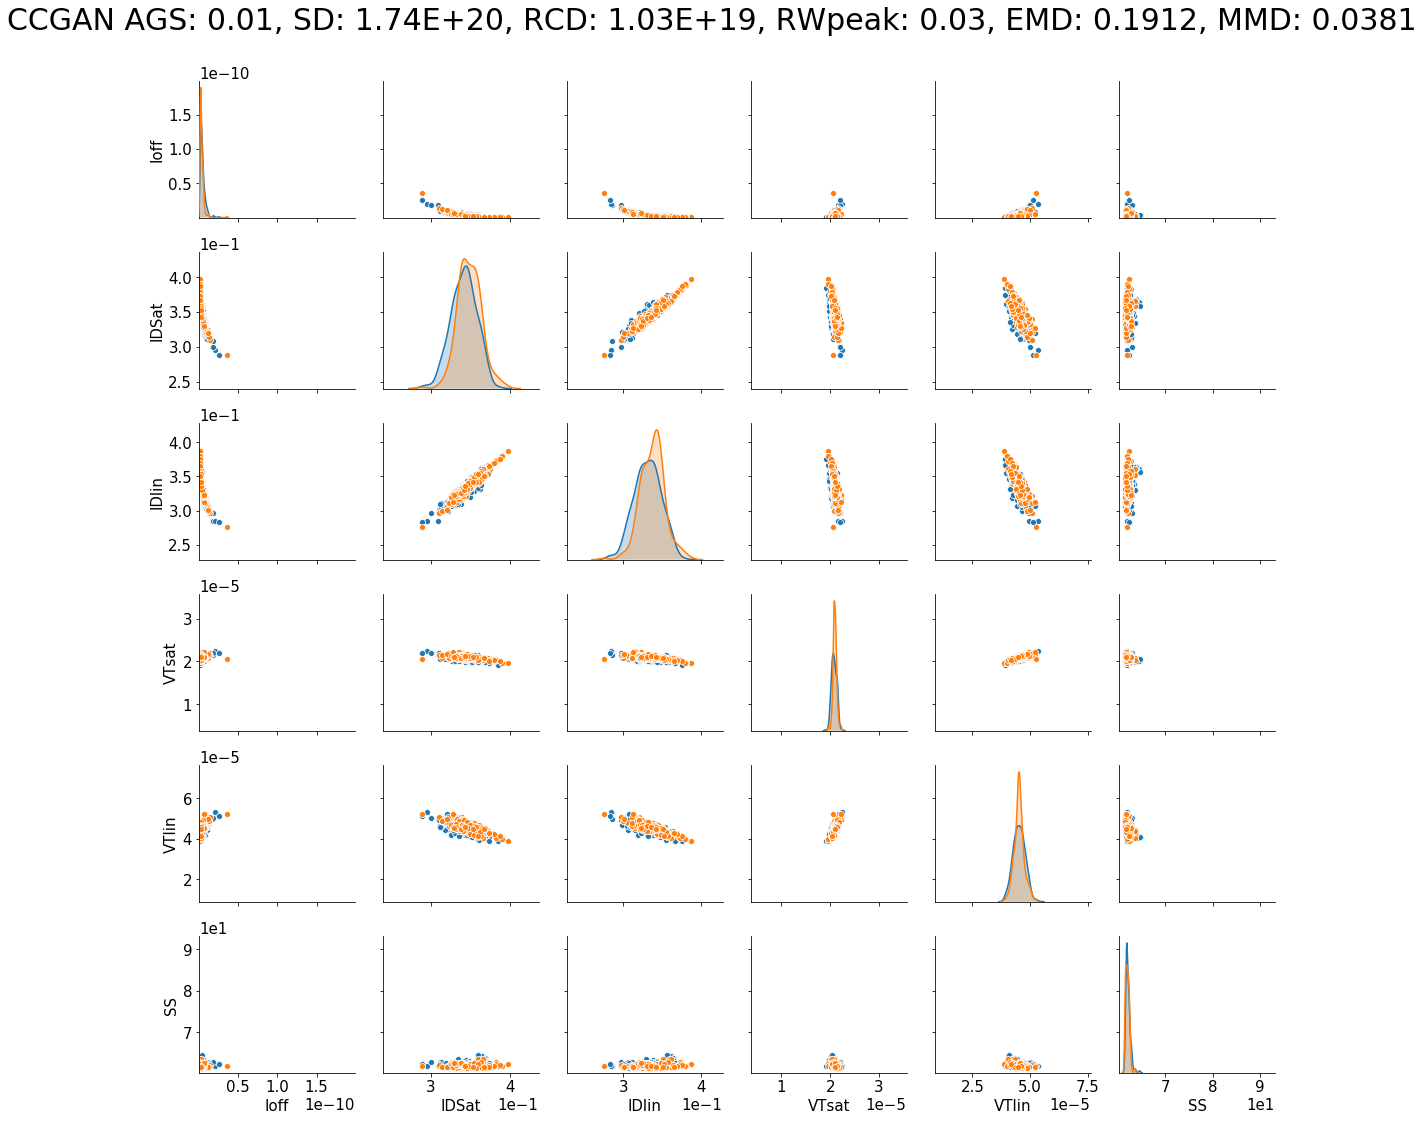

factor 7
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.85497107e-02 9.10148759e+19 8.11373190e+18 1.33503512e-02
 0.00000000e+00 1.00000000e+00]


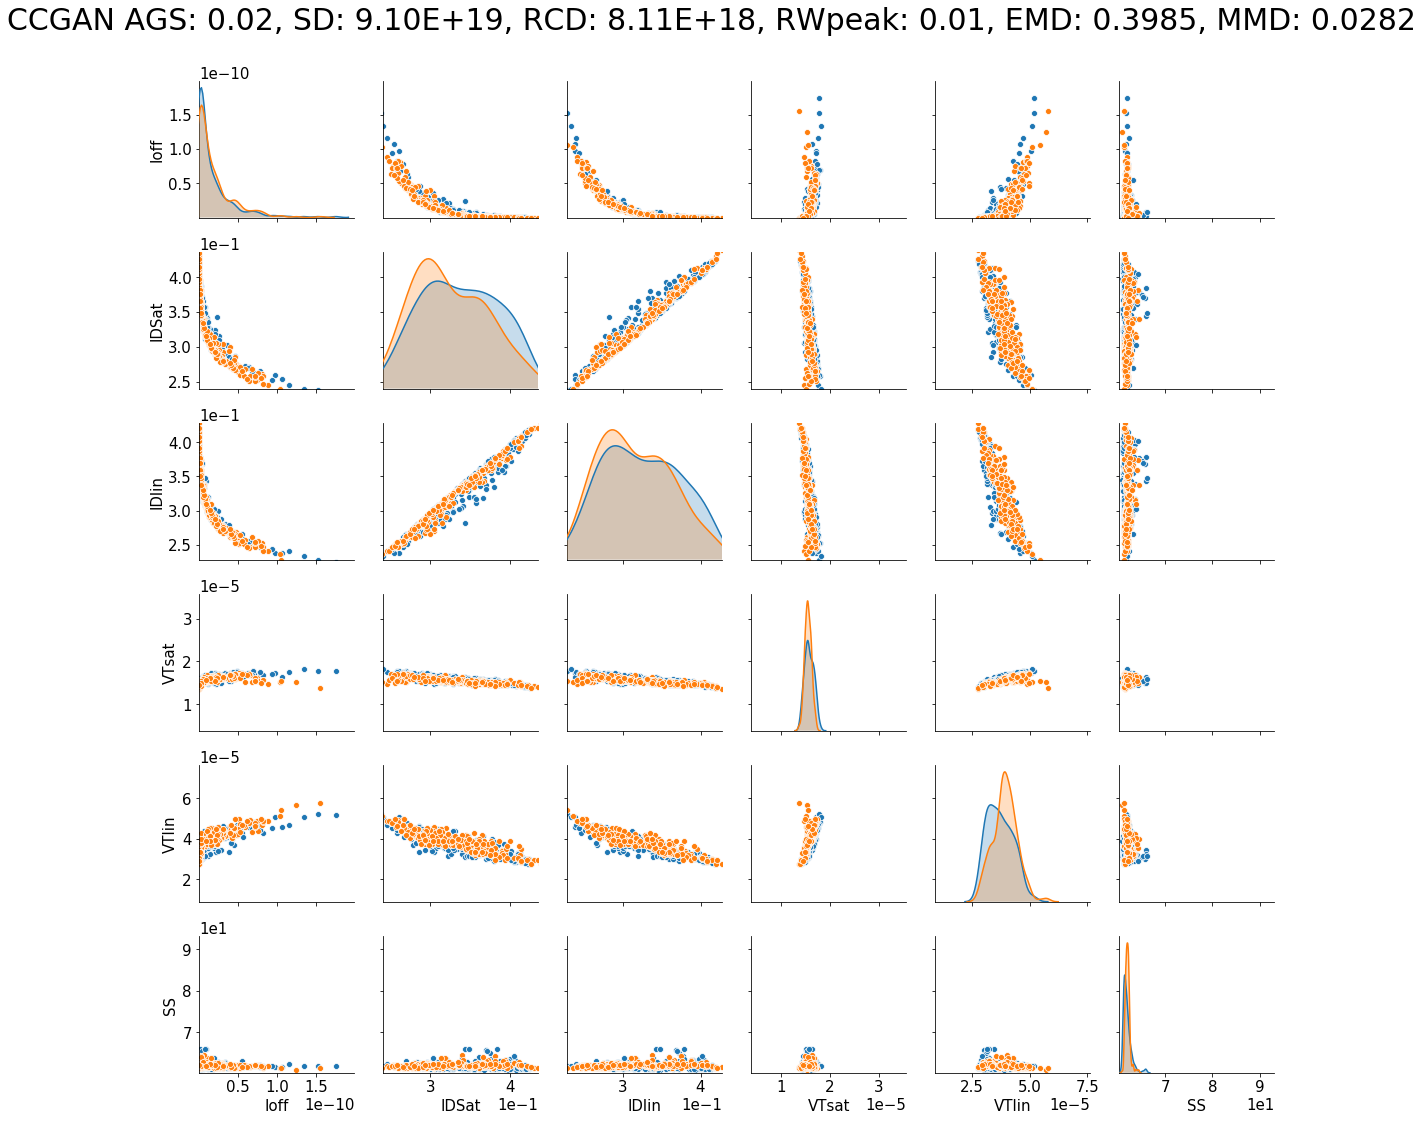

factor 8
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.51214486e-02 7.96001377e+19 1.34431524e+19 3.71338970e-02
 0.00000000e+00 1.00000000e+00]


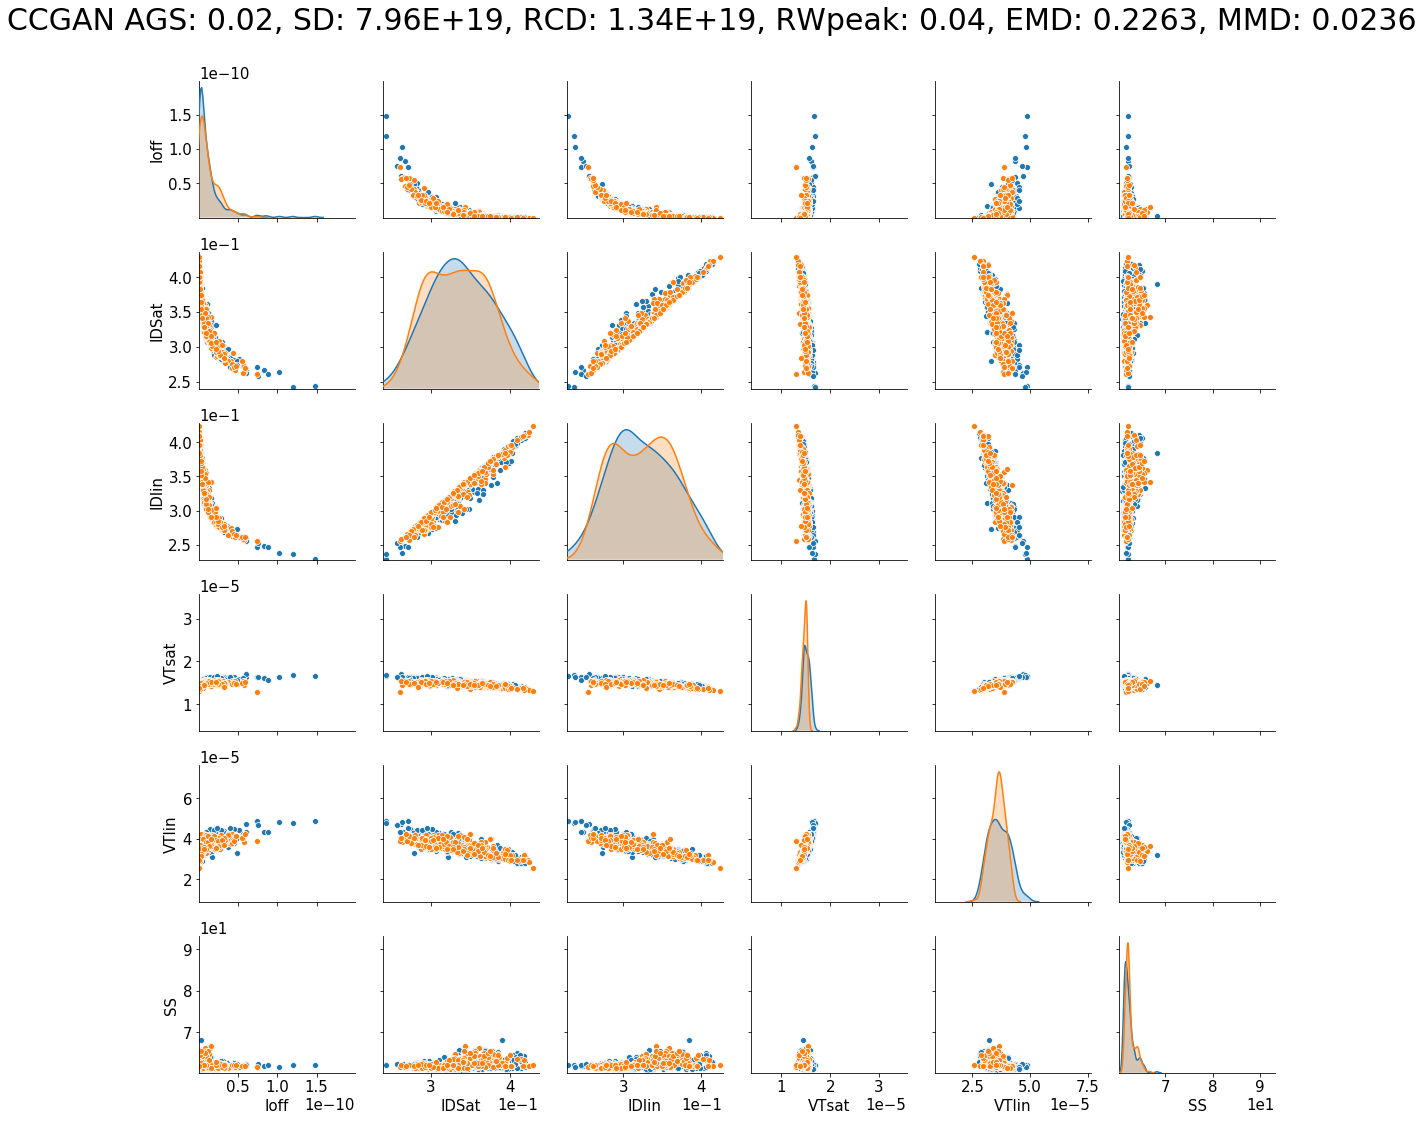

factor 9
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [5.76477267e-03 1.78541760e+19 1.45128022e+18 2.89983100e-02
 0.00000000e+00 1.00000000e+00]


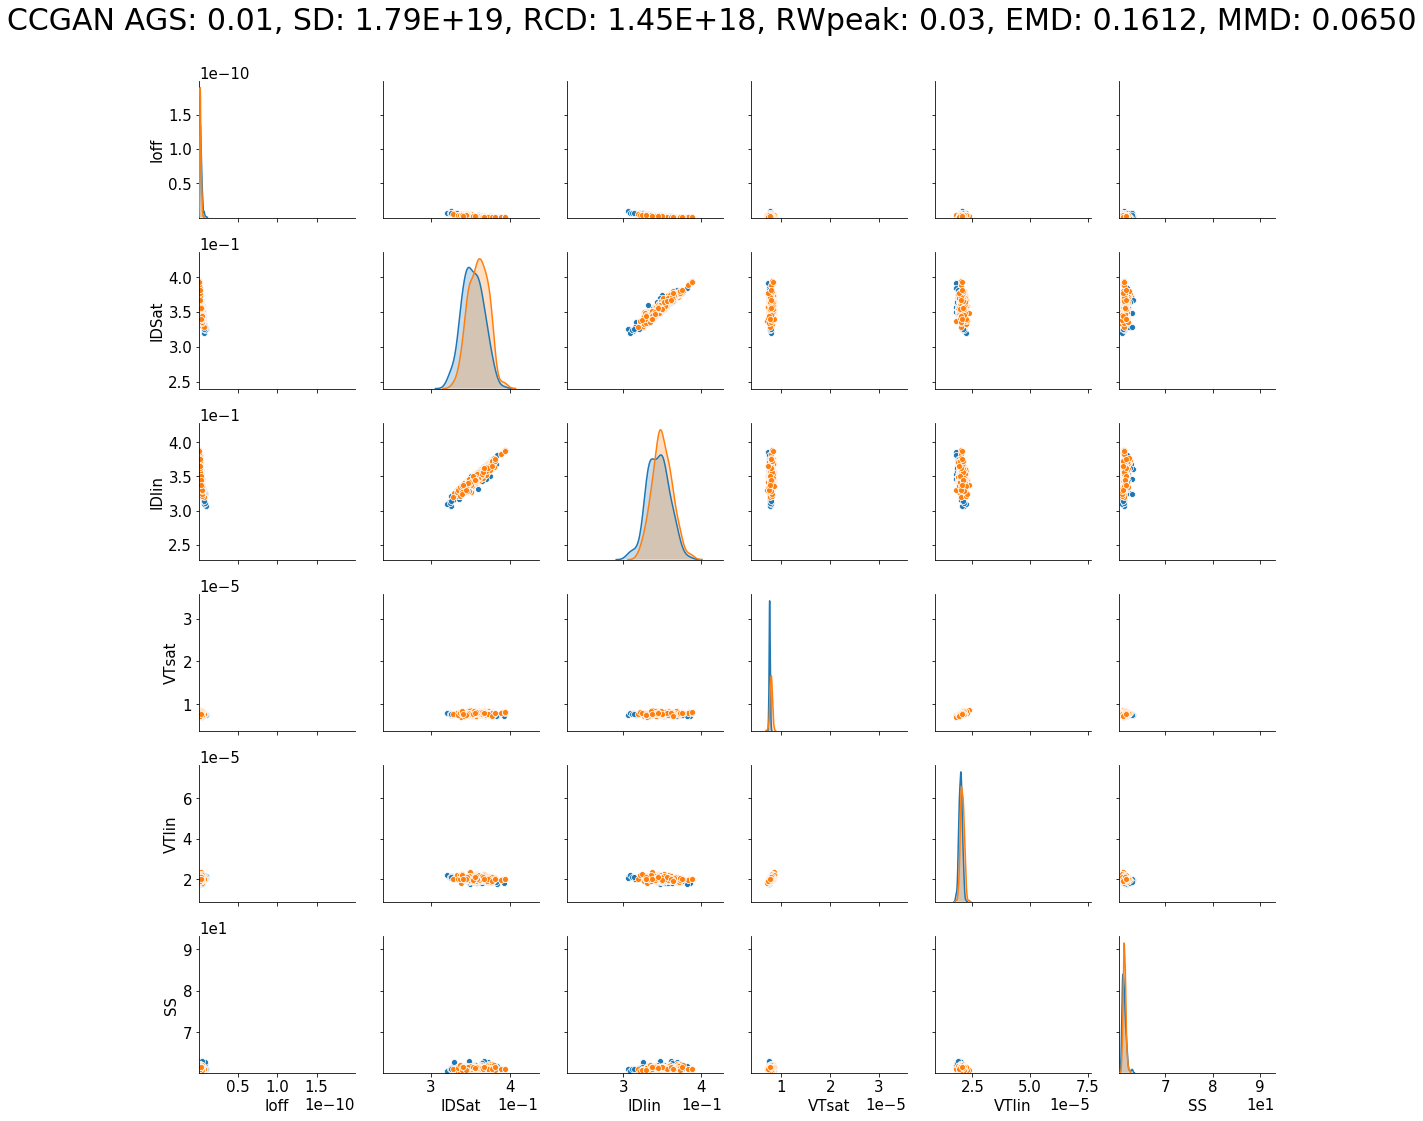

factor 10
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.14038836e-02 1.31645367e+19 1.70961252e+18 2.03493061e-02
 1.00000000e+00 1.00000000e+00]


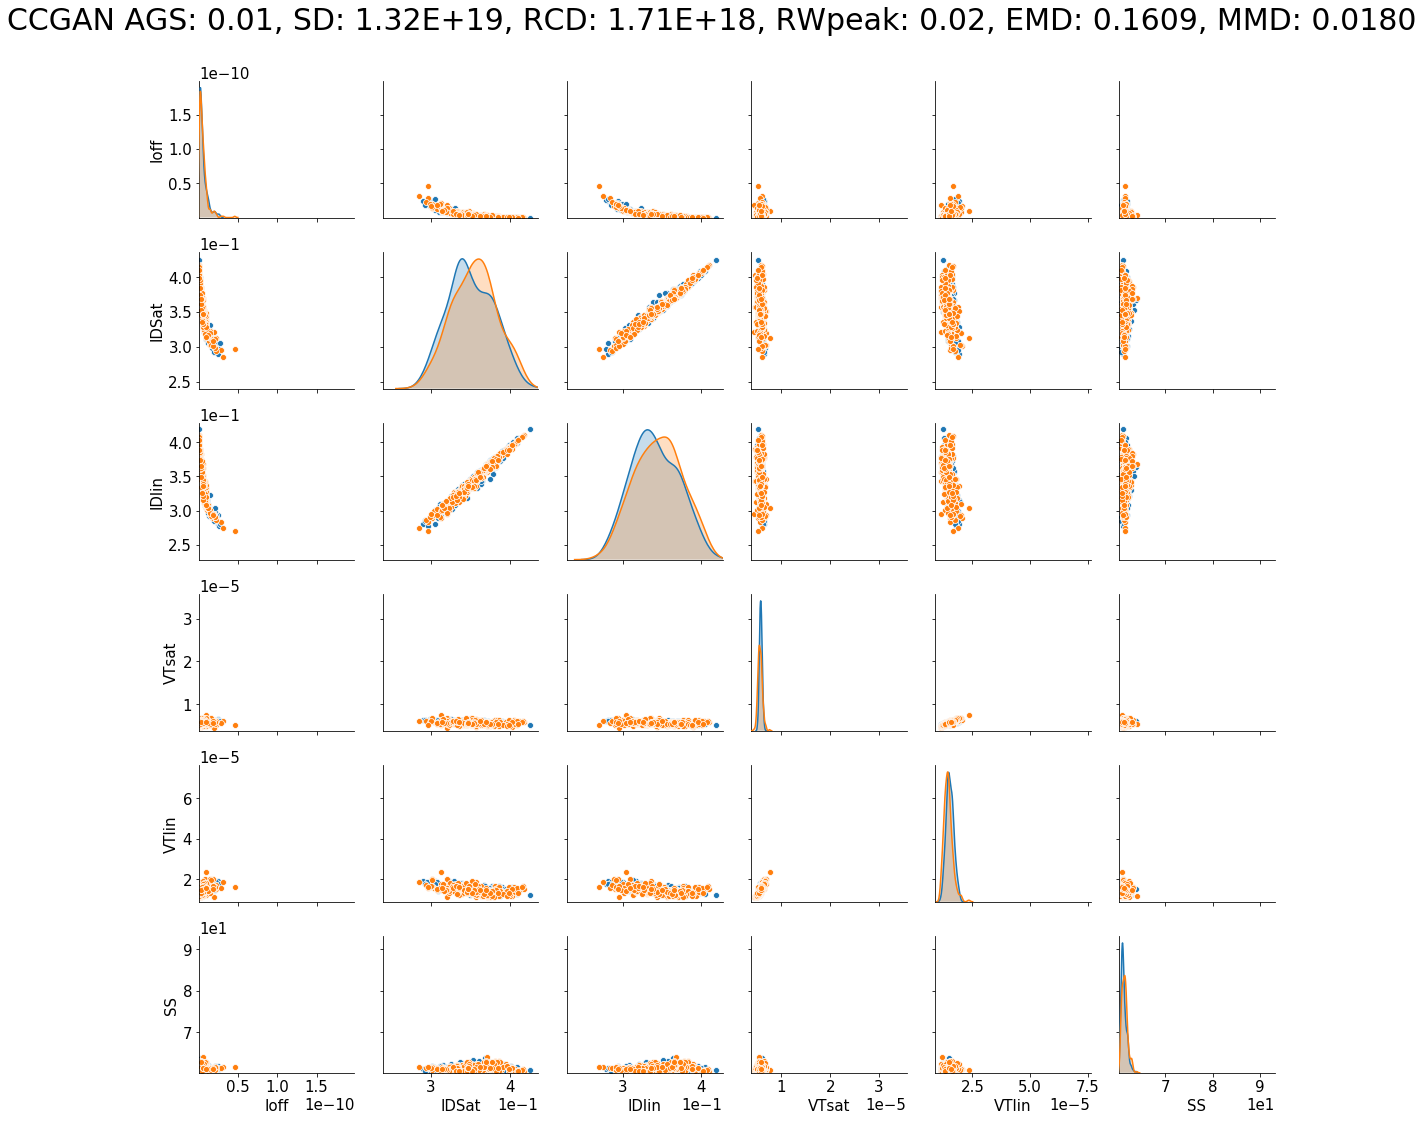

factor 11
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [6.92941109e-03 1.45486129e+19 2.04199471e+18 2.99891468e-02
 1.00000000e+00 1.00000000e+00]


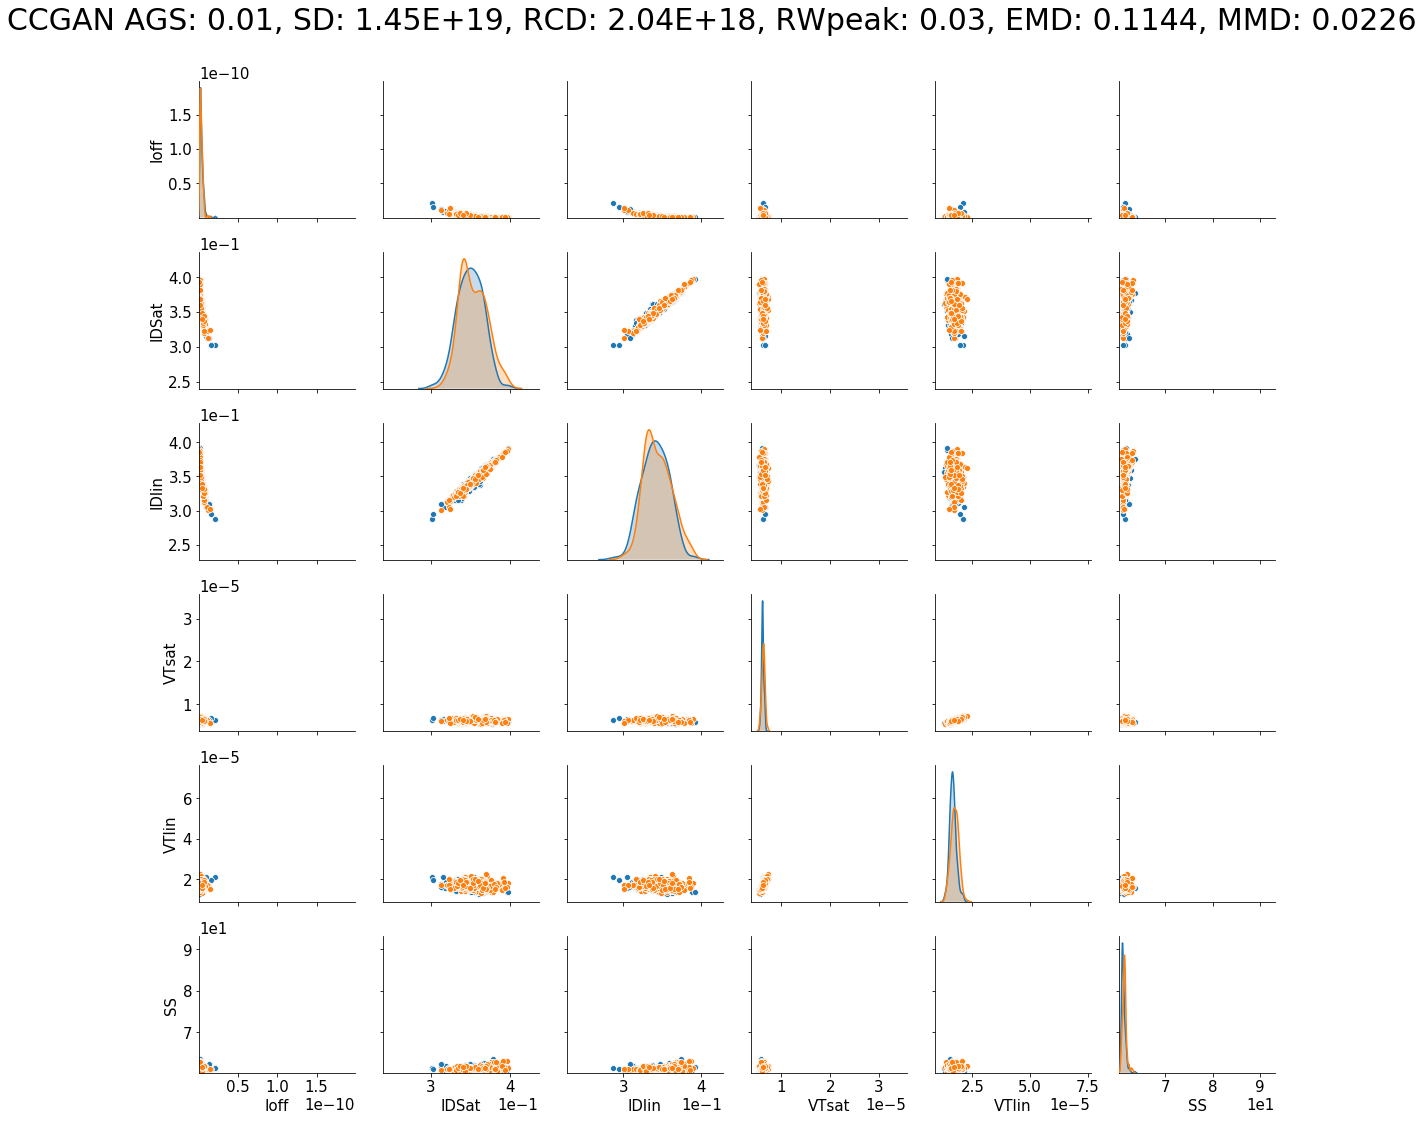

factor 12
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.11500611e-02 5.83810867e+20 9.06778227e+19 3.58321489e-02
 1.00000000e+00 1.00000000e+00]


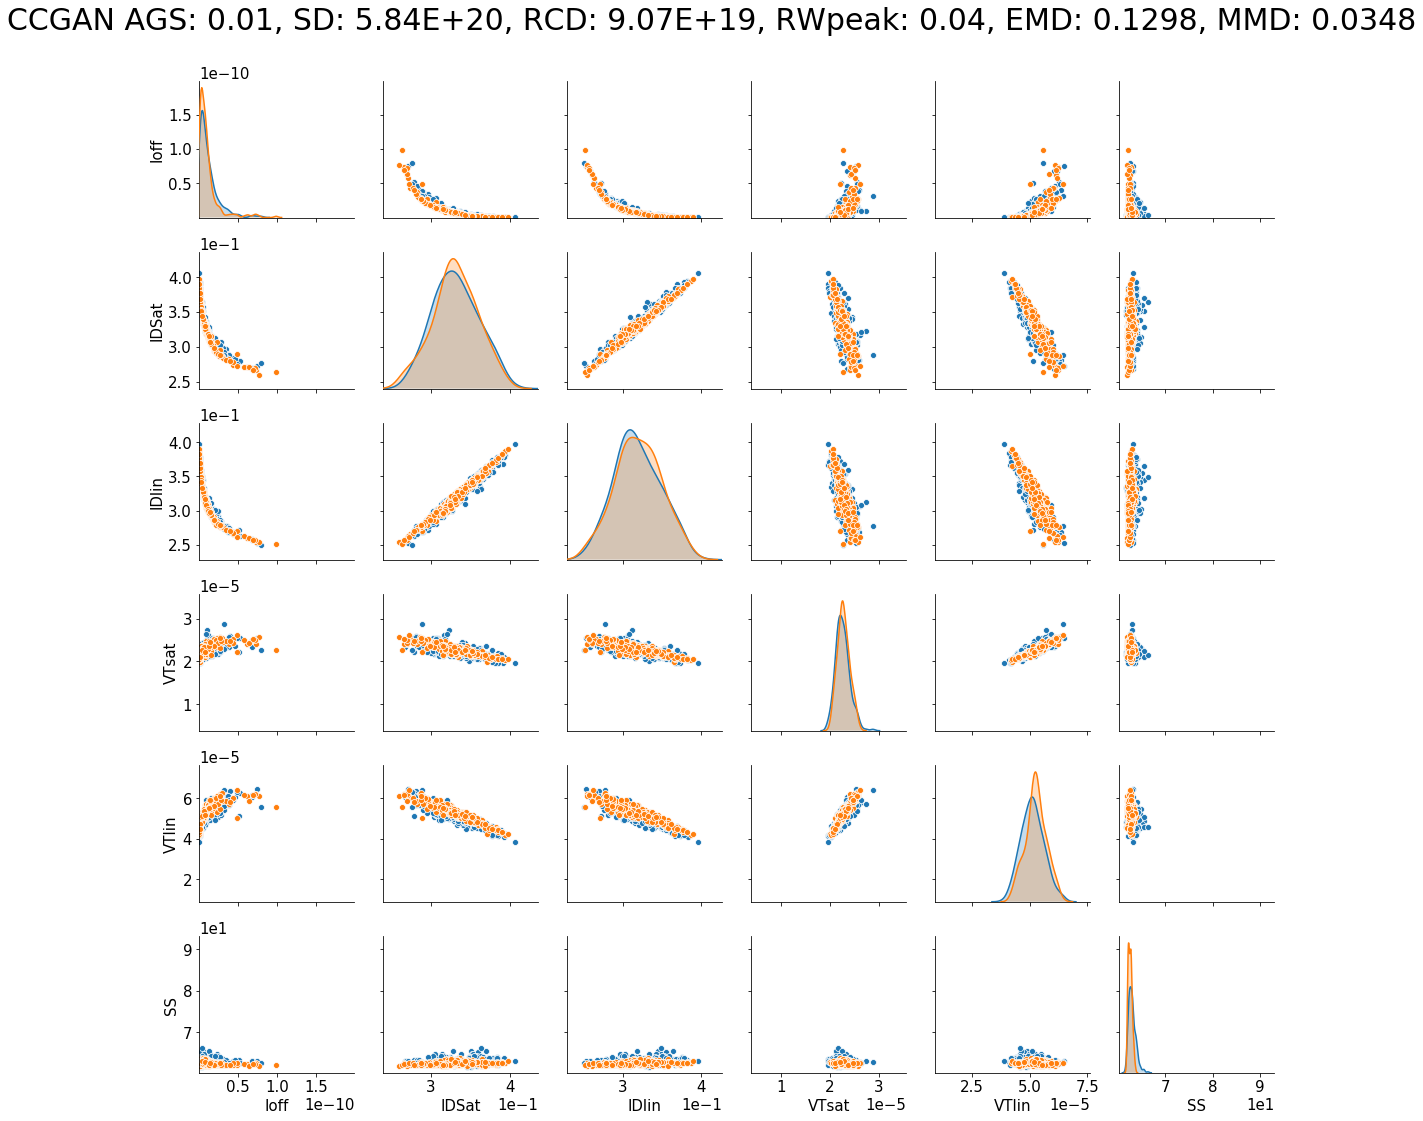

factor 13
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [5.99569405e-03 3.11638597e+20 4.11084838e+19 3.28533776e-02
 1.00000000e+00 1.00000000e+00]


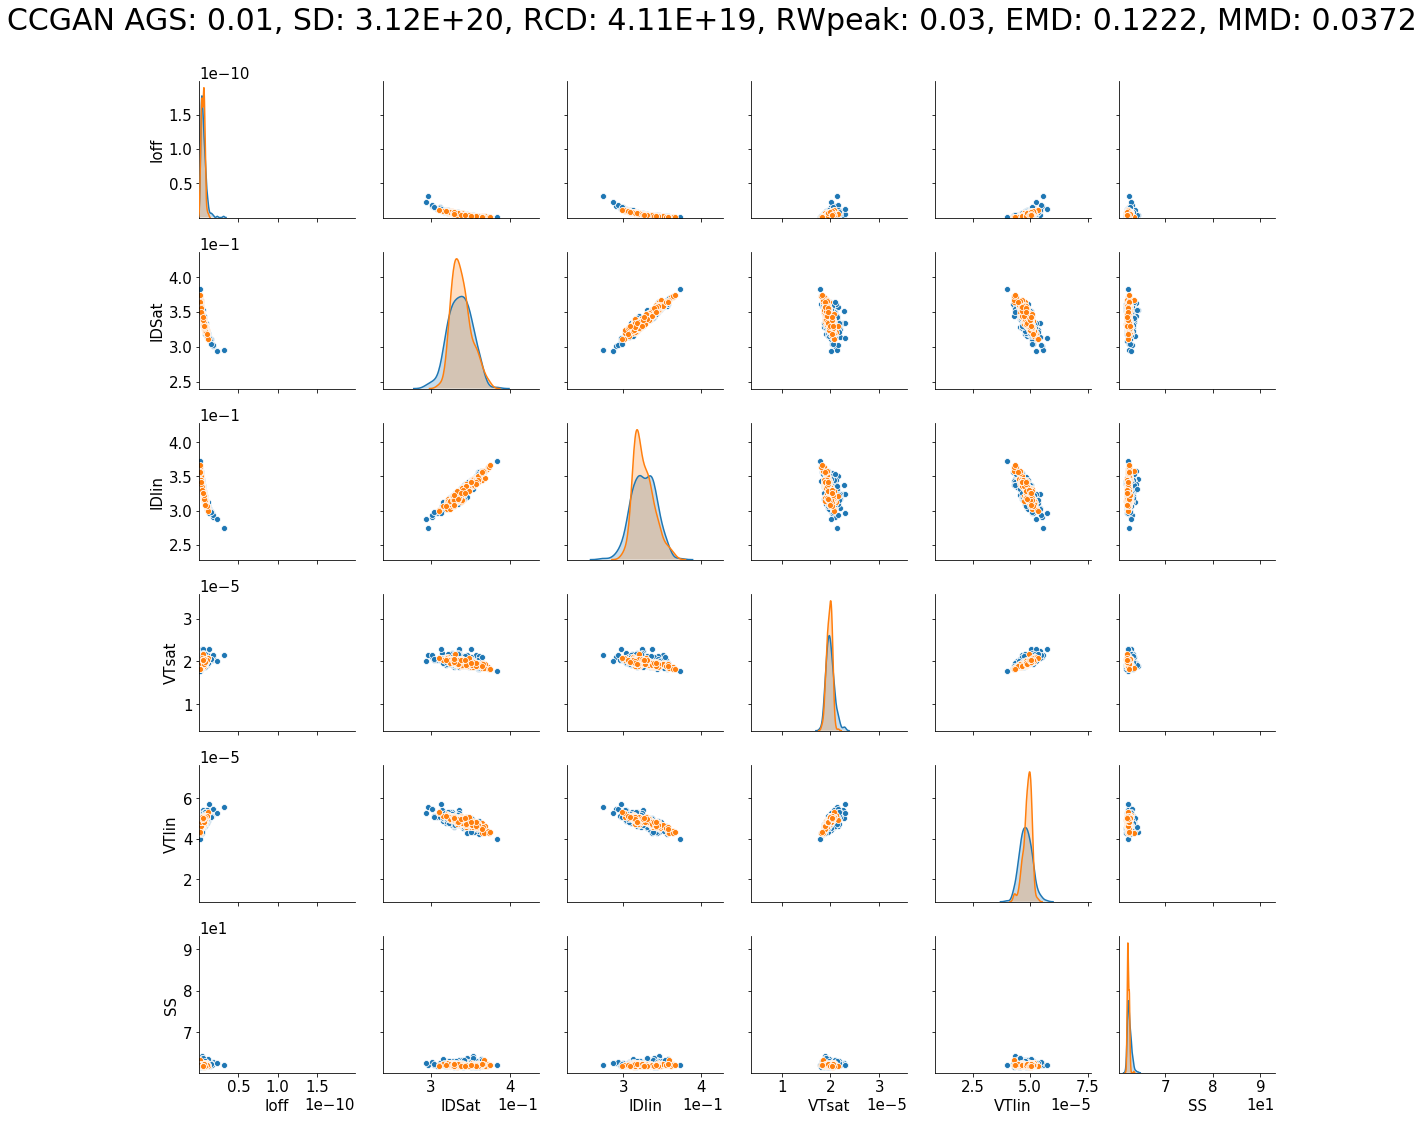

factor 14
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [3.18145645e-03 2.78173540e+20 1.99814564e+19 3.62751273e-02
 1.00000000e+00 1.00000000e+00]


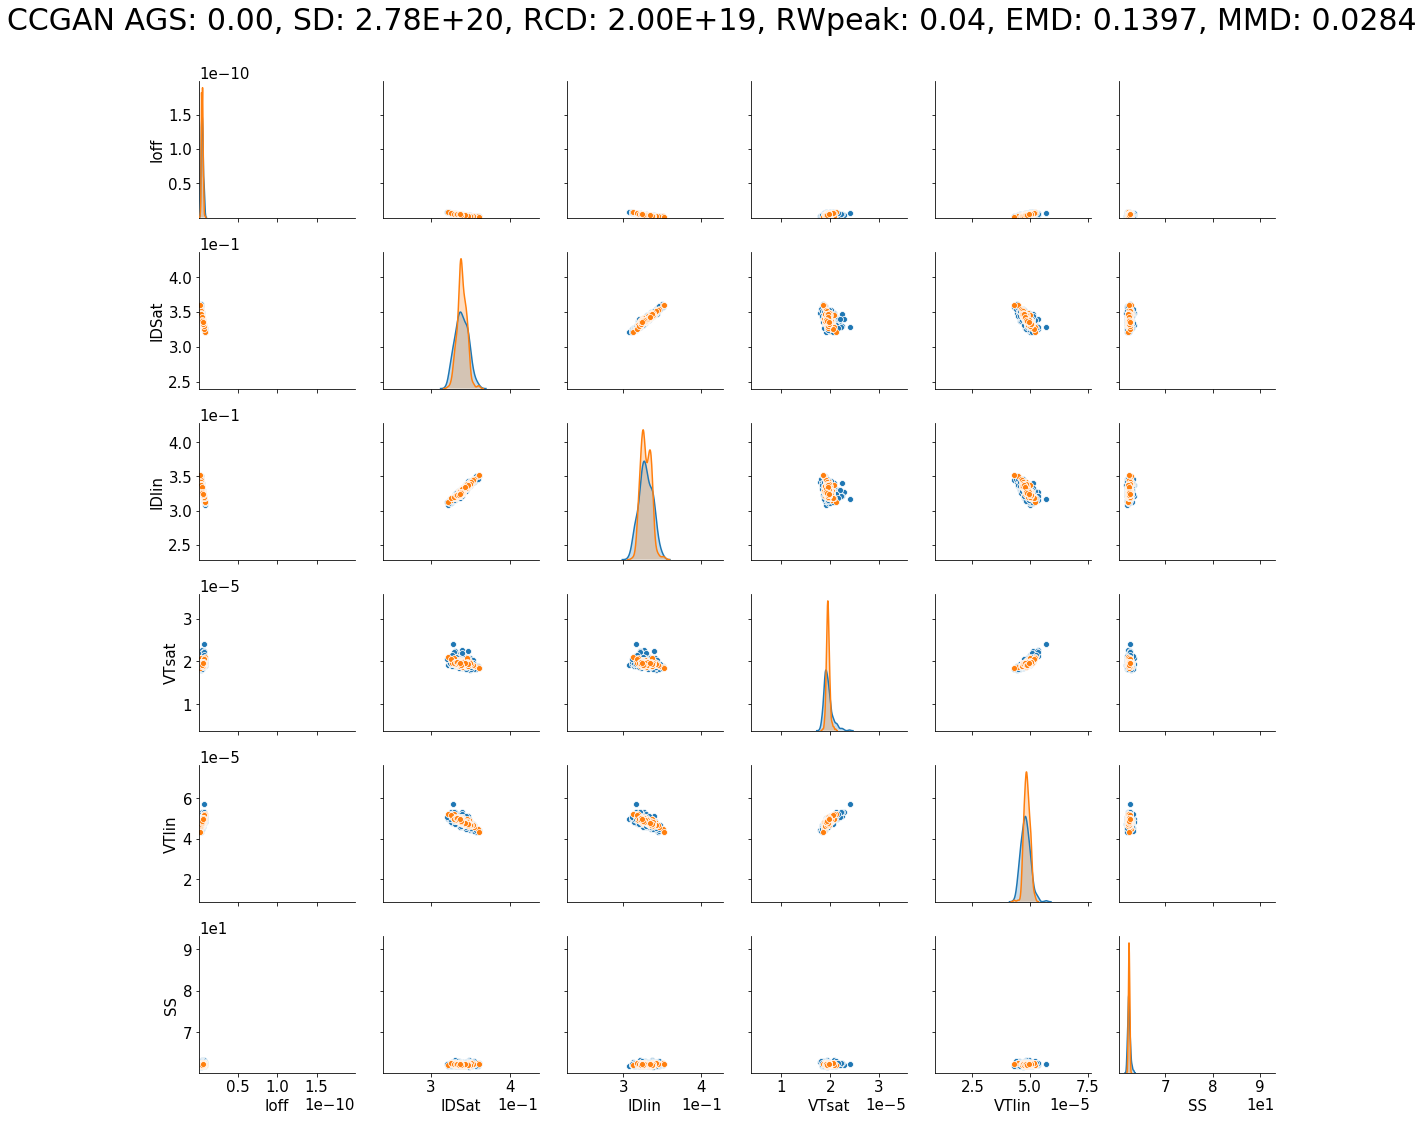

factor 15
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.33051257e-02 2.12039947e+19 2.46494333e+18 3.61370649e-02
 1.00000000e+00 1.00000000e+00]


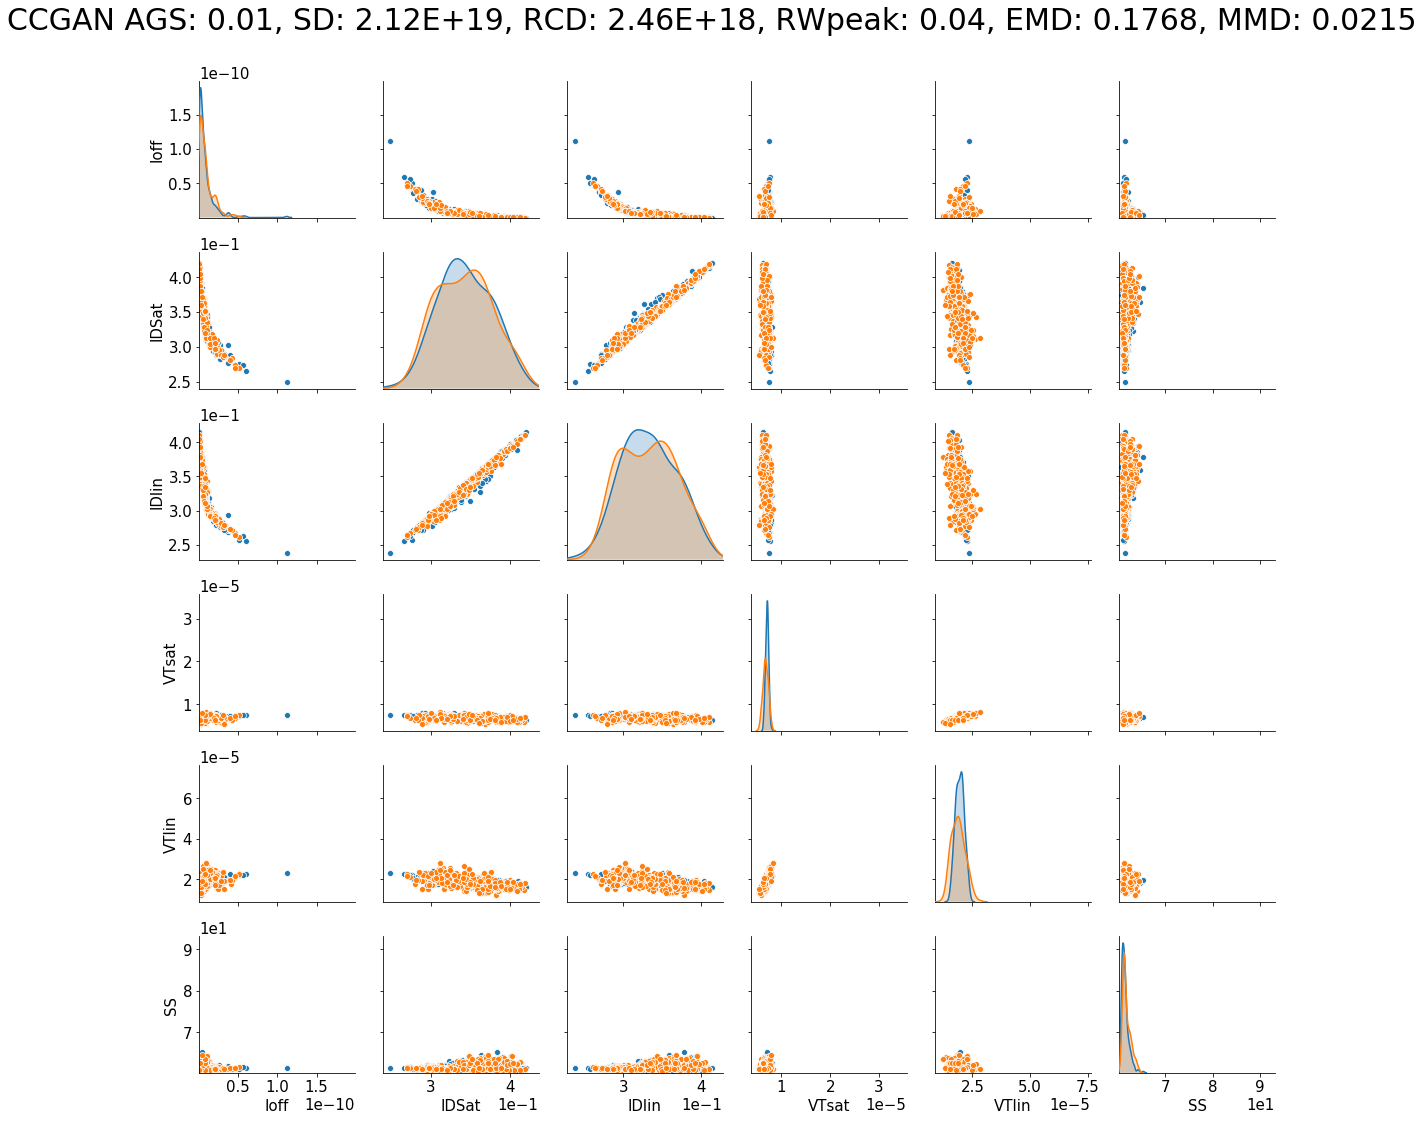

In [10]:
for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################

    # generated sample
    test_gan_matrix_plot = test_gen[factor]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[factor]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle, 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)
    
#     print(np.min(test_min_list))
#     print(np.max(test_max_list, axis=1))
    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CCGAN AGS: {:.2f}, SD: {:.2E}, RCD: {:.2E}, RWpeak: {:.2f}, EMD: {:.4f}, MMD: {:.4f}".format(X_test[0], X_test[1], X_test[2], X_test[3], test_emd[factor], test_mmd[factor]), y=1.04, fontsize=30)

        if minmax == 'train_real_global':
            g.axes[i,i].set_xlim((min_list[i], max_list[i]))
            g.axes[i,i].set_ylim((min_list[i], max_list[i]))
        elif minmax == 'test_real_local':
            g.axes[i,i].set_xlim((real_min_list[factor][0][i], real_max_list[factor][0][i]))
            g.axes[i,i].set_ylim((real_min_list[factor][0][i], real_max_list[factor][0][i]))

    for ax in g.axes.flatten():
        ax.ticklabel_format(style='sci', scilimits=(0,0), axis='both')
    
    plt.rcParams.update({'font.size': 15})
    plt.tight_layout()
#     plt.savefig('figures/RDFWFV/gaussian/Gen_Test_same_factor_{}_sample_{}_seed_990_9226_b.pdf'.format(factor, test_gen_sample_num), bbox_inches='tight', transparent=True, pad_inches=0)
#     plt.show()
    g._legend.remove()
    plt.show()
    g.savefig(fig_path+'/Gen_Test_same_factor_{}_sample_{}.pdf'.format(factor, test_gen_sample_num))
    
    ### 파란색이 real 주황색이 generated